In [1]:
import sklearn
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
data=iris['data']
data =np.array(data)

In [7]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
target=iris['target']

In [9]:
data=pd.DataFrame(data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
data.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [12]:
target=pd.DataFrame(target)

In [13]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [14]:
target.isnull().sum()

0    0
dtype: int64

In [15]:
data.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: ylabel='count'>

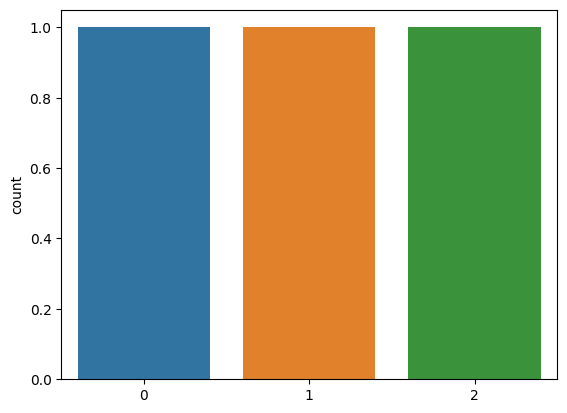

In [16]:
target.value_counts()
sns.countplot(target,x=[0,1,2])


In [17]:
data['SepalLengthCm']=data[0]
data['SepalWidthCm']=data[1]
data['PetalLengthCm']=data[2]
data['PetalWidthCm']=data[3]
data['target']=target

In [18]:
data=data.drop(0,axis=1)
data=data.drop(1,axis=1)
data=data.drop(2,axis=1)
data=data.drop(3,axis=1)

data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


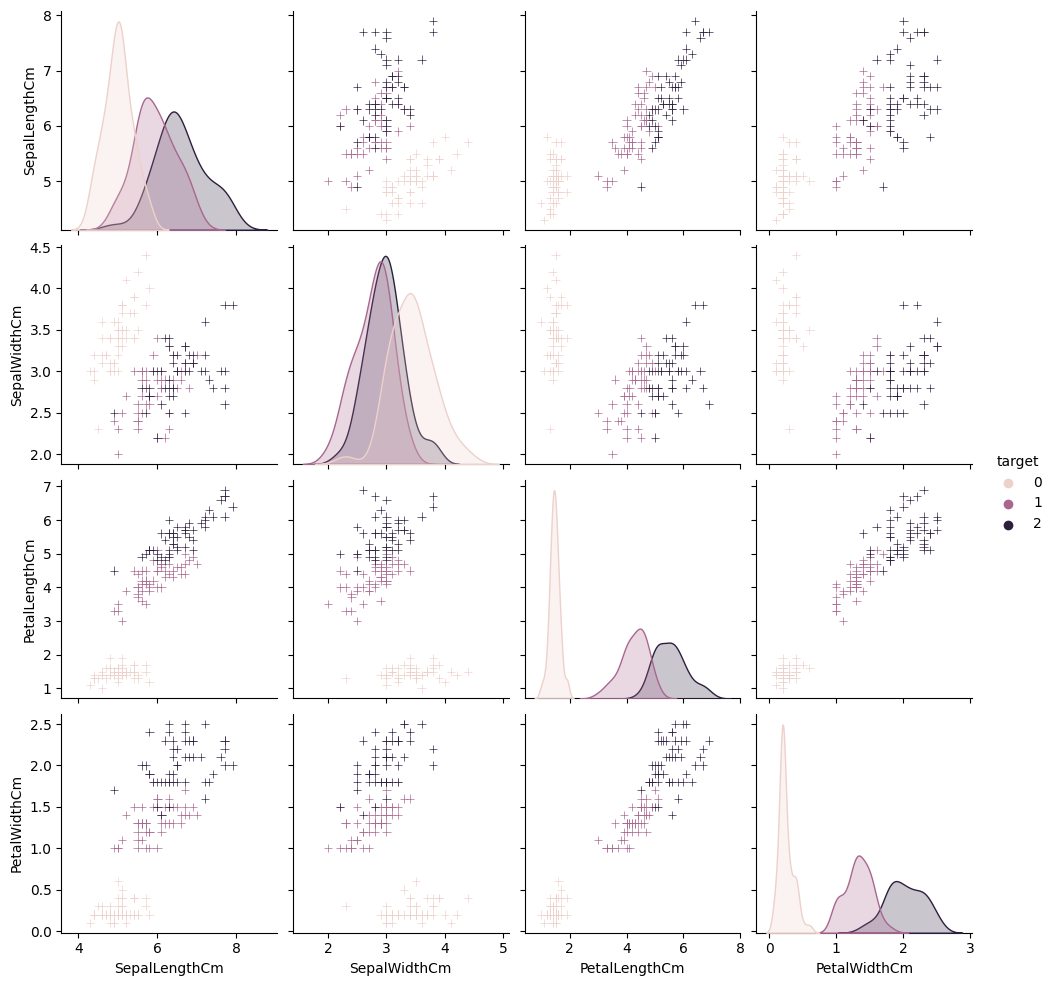

In [19]:
tmp = data
g = sns.pairplot(tmp, hue='target', markers='+')
plt.show()

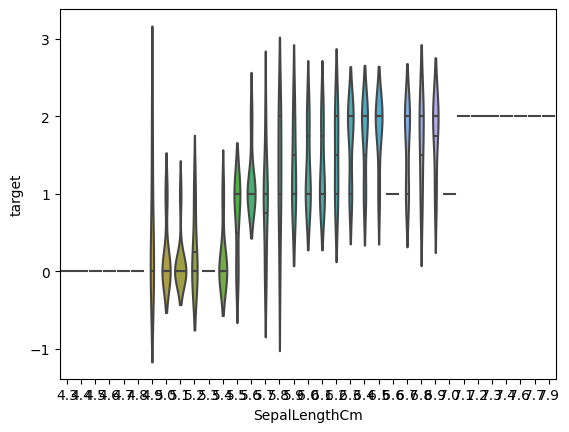

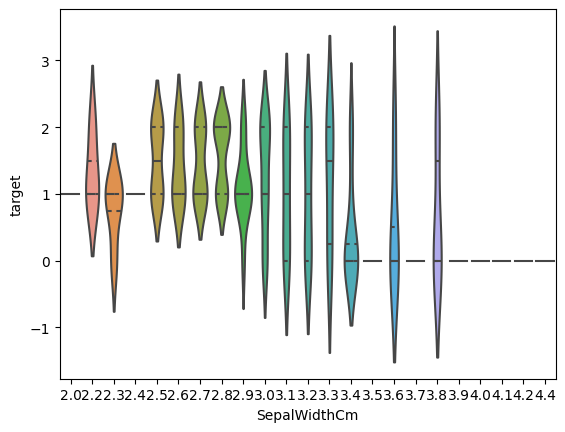

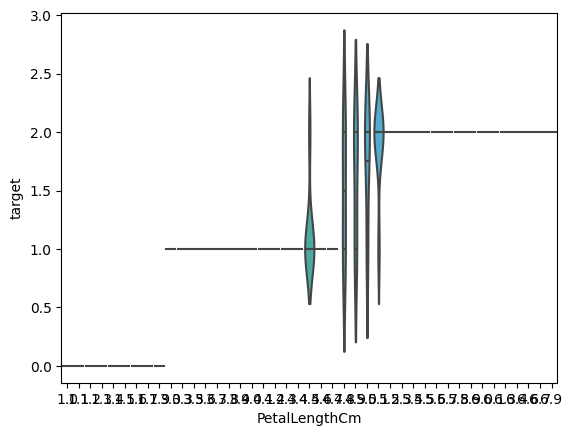

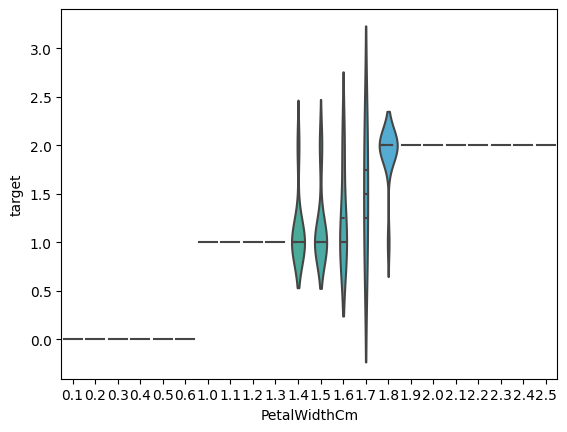

In [20]:
g = sns.violinplot(y='target', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='target', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='target', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='target', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

In [21]:
# data
target=data['target']
data=data.drop('target',axis=1)
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.33, random_state=42)

In [22]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
# y_pred = logreg.predict(x_test)
# print(metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = logreg.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [25]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [26]:
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


In [27]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [28]:
 clf = svm.SVC()
 clf.fit(x_train, y_train)

SVC()

In [29]:
y_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


In [30]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [31]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train)

In [32]:
y_pred = gnb.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.96


In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [34]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [35]:
y_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.98


In [36]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [37]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [38]:
y_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.98


In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [40]:
#Deep Learning

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [42]:
seed = 7
np.random.seed(seed)

In [43]:
# Label encode Class (Species)
# data

encoder = LabelEncoder()
encoder.fit(target)
encoded_Y = encoder.transform(target)
# One Hot Encode
target = np_utils.to_categorical(encoded_Y)

x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.33, random_state=42)


In [44]:
model = Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax') )
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
  model.fit(x=x_train,y=y_train,
           validation_data=(x_test,y_test),
          epochs=100)

Epoch 1/100
4/4 [==============================] - 4s 475ms/step - loss: 1.1798 - accuracy: 0.3500 - val_loss: 1.1673 - val_accuracy: 0.3000
Epoch 2/100
4/4 [==============================] - 0s 51ms/step - loss: 1.0702 - accuracy: 0.3500 - val_loss: 1.0739 - val_accuracy: 0.3000
Epoch 3/100
4/4 [==============================] - 0s 39ms/step - loss: 1.0043 - accuracy: 0.3500 - val_loss: 1.0305 - val_accuracy: 0.3400
Epoch 4/100
4/4 [==============================] - 0s 49ms/step - loss: 0.9786 - accuracy: 0.4300 - val_loss: 0.9967 - val_accuracy: 0.4800
Epoch 5/100
4/4 [==============================] - 0s 32ms/step - loss: 0.9537 - accuracy: 0.5300 - val_loss: 0.9650 - val_accuracy: 0.5200
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 0.9282 - accuracy: 0.5600 - val_loss: 0.9360 - val_accuracy: 0.4800
Epoch 7/100
4/4 [==============================] - 0s 53ms/step - loss: 0.9043 - accuracy: 0.5600 - val_loss: 0.9101 - val_accuracy: 0.4600
Epoch 8/100
4/4 [==